# Decisions, Decisions, Decisions...

For my last biweekly report, I wanted to focus on a structure that has always intrigued me, due to coming from a computer science backround, as well as just liking the phrase. Decision Tree's are not only a structure used in machine learning , but also other fields such as decision analysis, but for today's sake we will highlight the structures strength when it comes to classification, as well as understanding as much as possible regarding these structures. 

**Quick Summary:**

To summarize, decision tree's are a structure aimed to classify data points, based on feature splits, which we can interpret as questions. For example, if I wanted to sort toy cars from toy soldiers, I could have a node that would ask the question:
    
"Do you have wheels?"

and unless there are some odd soldiers I don't know about, we should be able to classify our data set. This is the intution behind decision tree's, where we aim to 
gain the most *knowledge* at every partition of the data set. But how exactly is knowledge measured? 

**The Name of the Game: Entropy**

The way knowldege gained at each partition is measured, is through *Entropy*. Entropy is used to tell us how untidy our partitioned data is. We can calculate the *Information Gain* using calculations for Entropy. To put everything together simply:

*Entropy* $= -(P_+log(P_+) + P_- log(P_-)$  ( Where $P_-$ are the portion of *negative* samples and $P_+$ are the portion of *positive* examples)

*Information Gain* = $Entropy - \sum \frac{S_v}{S}Entropy$  (Where $S_v$ is the subset of S correlating to V) 

I'll delve into a further example, to fully show how the knowledge gained from a decision node is gauged. I'll use the classic, classic example of classyfing Cats and Dogs. Let's say we had a data set with 9 cats, and four dogs. The initial entropy of of the data set would be:

$Entropy(S) = -(\frac{9}{14}log(\frac{9}{14}) + \frac{5}{14}log(\frac{5}{14})) = 0.940$

We can allow Cats to be the "positive" outcome, and dogs to be the "negative" outcome. The entropy can be interpreted as a high level of impurity in the dataset.

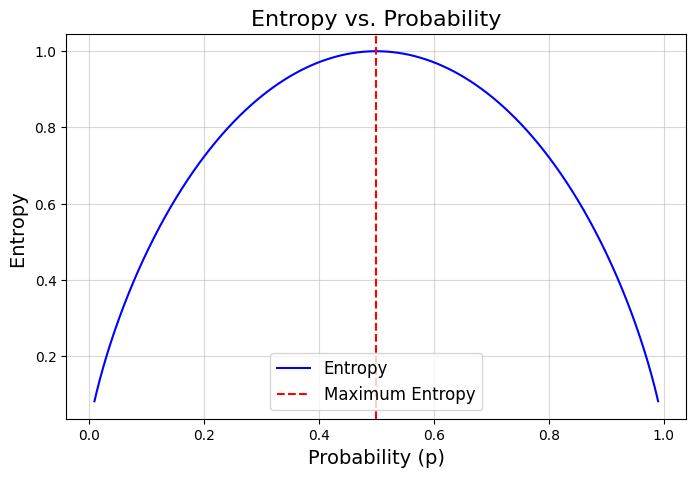

In [18]:
#Don't Mind, Simply for the figure
import numpy as np
import matplotlib.pyplot as plt

# Define entropy function
def entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# Probability values from 0 to 1 (excluding 0 and 1 to avoid log errors)
p = np.linspace(0.01, 0.99, 500)
entropy_values = entropy(p)

# Plotting the entropy graph
plt.figure(figsize=(8, 5))
plt.plot(p, entropy_values, label="Entropy", color="blue")
plt.title("Entropy vs. Probability", fontsize=16)
plt.xlabel("Probability (p)", fontsize=14)
plt.ylabel("Entropy ", fontsize=14)
plt.axvline(0.5, color='red', linestyle='--', label="Maximum Entropy")
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()


The above graph showcase that at E = 1 , are data set is split in the middle of two classes, that being the most impure we can be. This is how we use entropy to calculate information gain, as we want to decrease our entropy, and increase our information gained. Now, let's say we made a decision to split the data set based on "Do they have pointy ears", and we end up with two new subsets:

8 cats , 1 dog

1 cat, 4 Dogs

We can measure the Information Gain as: 

$Information Gain = Original Entropy - ((weight_1)Entropy_{Split1} + (weight_2)Entropy_{Split2} )$

$Information Gain =  0.940 $(our original entropy) - $ ( \frac{9}{14} \cdot -(\frac{8}{9}log(\frac{8}{9}) + \frac{1}{9}log(\frac{1}{9}) ) + (\frac{5}{14} \cdot -(\frac{1}{5}log(\frac{1}{5}) + \frac{4}{5}log(\frac{4}{5}))) $

$Information Gain = 0.94 - 0.58 = 0.36 $


This is to say, that if we use our queastion to partition the set in such a way, 0.36 is the knowledge gained, which is positive (we want a knowledge gain as close to zero as possible). Now, lets showcase a decision tree at work, even on non-linear data sets, in order to appreciate their strenghts.

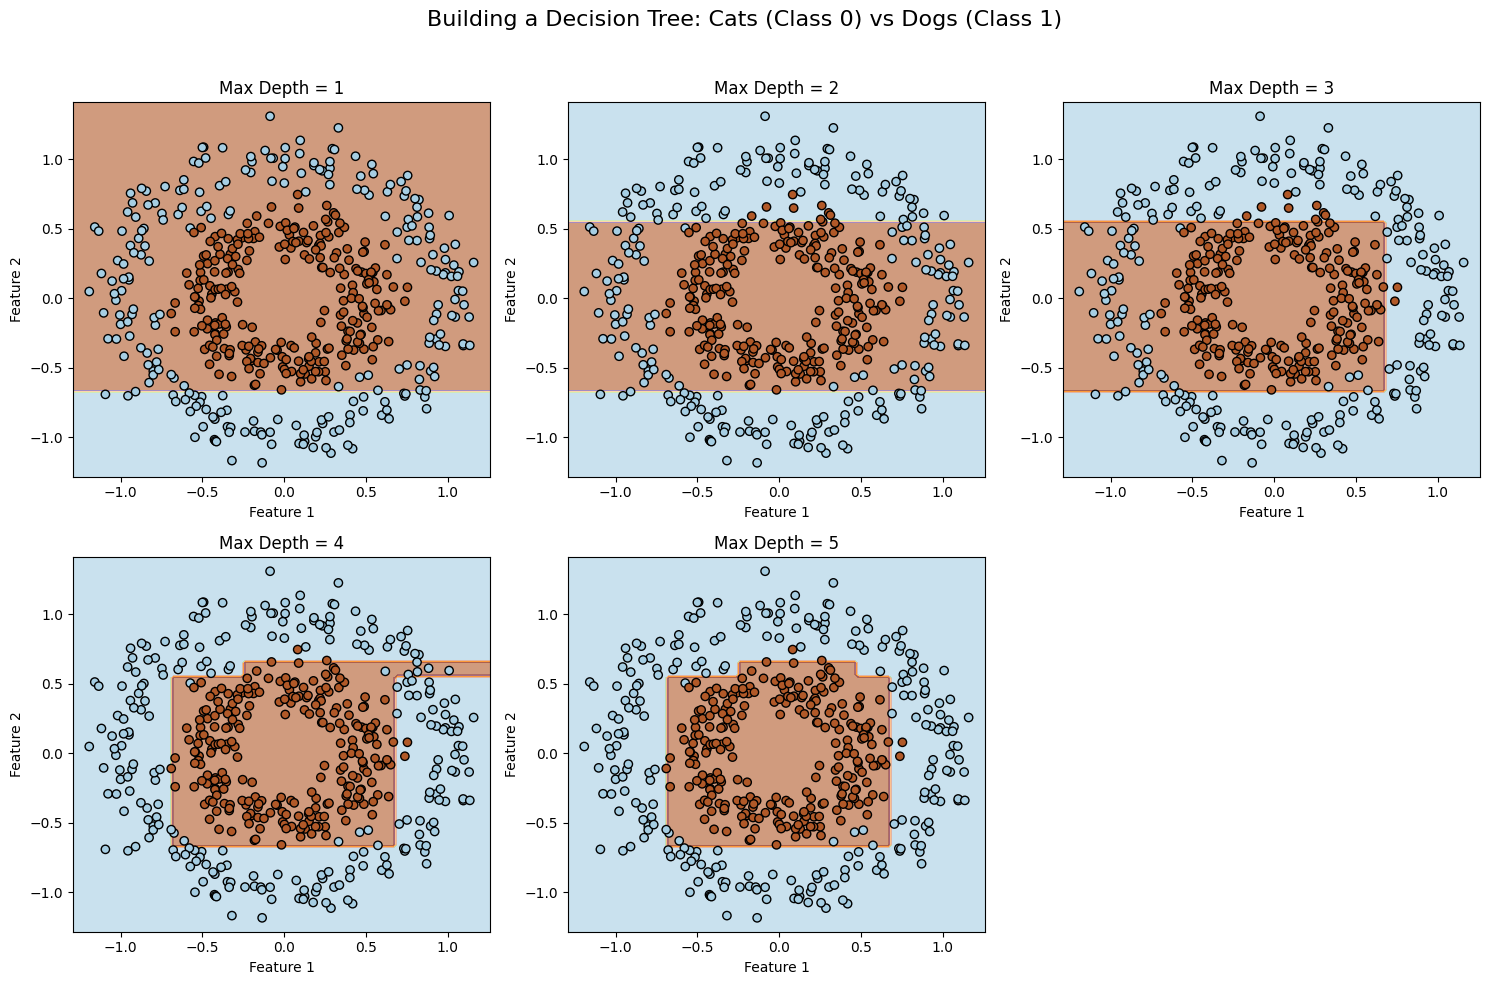

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.tree import DecisionTreeClassifier

# Generate synthetic dataset
X, y = make_circles(n_samples=500, noise=0.1, factor=0.5, random_state=42)

# Function to plot decision boundaries
def plot_decision_boundary(tree, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

# Create subplots for each step
max_depths = range(1, 6)  # Showcase steps up to max_depth = 5
plt.figure(figsize=(15, 10))

for i, max_depth in enumerate(max_depths, start=1):
    # Train a decision tree with the current max depth
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree.fit(X, y)
    
    # Plot decision boundary
    plt.subplot(2, 3, i)
    plot_decision_boundary(tree, X, y, title=f"Max Depth = {max_depth}")

# Add overall title and adjust layout
plt.suptitle("Building a Decision Tree: Cats (Class 0) vs Dogs (Class 1)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



As we can see from above, after each iteration , the tree makes a **cut** with the highest information gain, which not only insures that we are making the best, the greediest cut at each step, but also that when we stop (as long as we avoide overfitting ), are going to an appropriate depth.

# Growing the Right Tree #
Now, while Decision Tree's are powerful, like all things, come with weaknesses. However, the two I want to introduce aren't exlcusive to Decision Tree's, but are relevant to all models, andt those are the devils **Bias** and **Variance**.

**Bias** occurs in decision tree's when we have an overly, (emphasis on overly), simplisitc model when in reality our data is much more complex. This is essentilly when we have over simplifed splits, and the tree cannot fully grasp/work on the feature space. 

**Variance** occurs on the opposite side of the spectrum, where our tree seemingly has no max depth, usually caused by highly specifc decision boundaries causing a large tree to exist. It's overfitting every point, essentially having a decision node for each.  

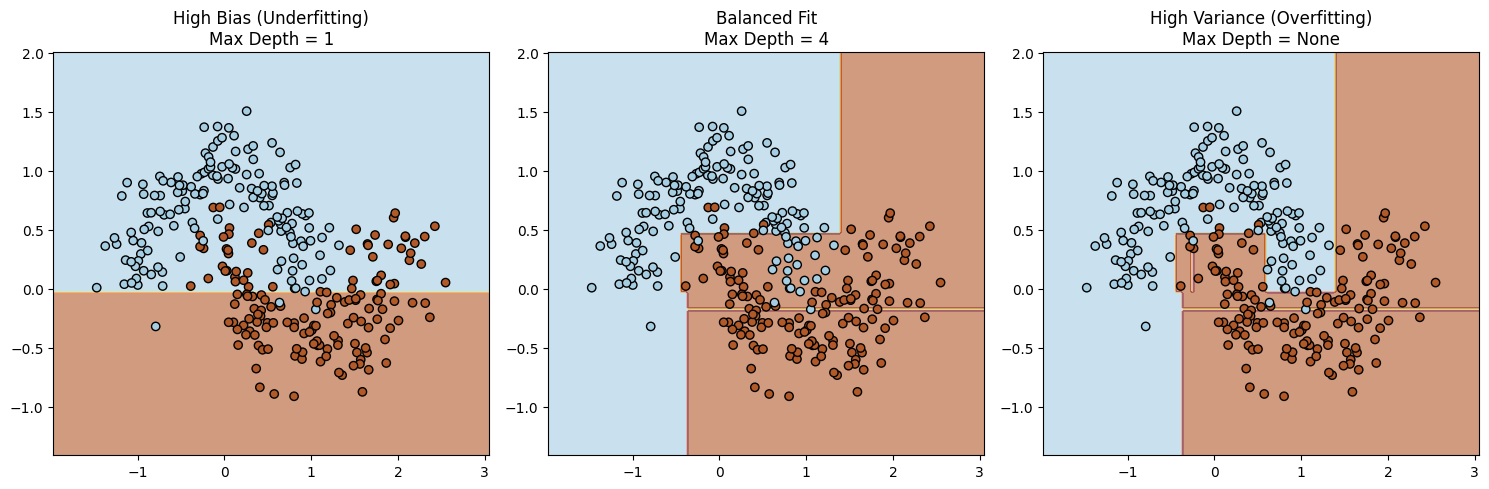

Accuracy of High Bias (Underfitting) Tree: 0.8133
Accuracy of Balanced Tree: 0.9133
Accuracy of High Variance (Overfitting) Tree: 1.0000
Depth of Overfit Tree:  9


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Generate synthetic dataset (non-linear patterns)
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# Function to plot decision boundaries
def plot_decision_boundary(tree, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
    plt.title(title)

# High Bias (Underfitting): Shallow Tree
tree_underfit = DecisionTreeClassifier(max_depth=1, random_state=42)
tree_underfit.fit(X, y)
y_pred_underfit = tree_underfit.predict(X)
accuracy_underfit = accuracy_score(y,y_pred_underfit)

# Balanced Tree (Reasonable Fit)
tree_balanced = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_balanced.fit(X, y)
y_pred_balanced = tree_balanced.predict(X)
accuracy_balanced = accuracy_score(y,y_pred_balanced)

# High Variance (Overfitting): Deep Tree
tree_overfit = DecisionTreeClassifier(max_depth=None, random_state=42)
tree_overfit.fit(X, y)
y_pred_overfit = tree_overfit.predict(X)
accuracy_overfit = accuracy_score(y,y_pred_overfit)

# Plot decision boundaries for each tree
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plot_decision_boundary(tree_underfit, X, y, title="High Bias (Underfitting)\nMax Depth = 1")

plt.subplot(1, 3, 2)
plot_decision_boundary(tree_balanced, X, y, title="Balanced Fit\nMax Depth = 4")

plt.subplot(1, 3, 3)
plot_decision_boundary(tree_overfit, X, y, title="High Variance (Overfitting)\nMax Depth = None")

plt.tight_layout()
plt.show()

# Print the accuracies
print(f"Accuracy of High Bias (Underfitting) Tree: {accuracy_underfit:.4f}")
print(f"Accuracy of Balanced Tree: {accuracy_balanced:.4f}")
print(f"Accuracy of High Variance (Overfitting) Tree: {accuracy_overfit:.4f}")
print("Depth of Overfit Tree: " ,tree_overfit.tree_.max_depth)

Using a decision tree model on the moons data set, which does have a particular structure, we can make a few comparisons. With High Bias, we see the lowest accuracy, but the smallest sized tree. We still boast an 81% accuracy, but that most arises from the fact that we have a not-so complex data distrubution. With a balanced tree, we have an accuracy of 90%, with a reasonable depth of 4. With the High Variance tree, we are more than double that depth, but have an accuracy of 100%. Now, while good, there are many things to consider. 100% means we the tree has conformed to every data point exactly. While in this data set, 9 isn't too concerning, we have to think about large scale data in the big data age. A decision tree confroming to every point quite literally will never end, and the tree traversal at best would be $\theta (logn)$, but not only is that in a perfect world, that N would be in the trillions. 

# Putting the Tree to the Test #
To showcase the power of decision tree's, as well as how they work in a practical setting, I will be using the car evaluation dataset, from :

https://archive.ics.uci.edu/dataset/19/car+evaluation

This data set includes points with labels on the evaluation of a car that go as follows:
- vgood is of course the highest
- good is next best
- acc stands for acceptable
- unacc stands for unnacceptable

The decision tree will attempt to classify these entries and accuratley predict their evaluation. (Originally, the dataset wasn't structured as such, but I thought it would make more sense).

In [21]:
import pandas as pd

# Load the feature names from the c45-names file
with open('car.c45-names', 'r') as f:
    feature_names = [line.strip() for line in f.readlines()]

# Load the car.data file (assuming CSV-like format)
car_data = pd.read_csv('car.data', header=None)

# Assign column names (the last one is the target)
car_data.columns = feature_names

# Print the first few rows of the data
print(car_data.head())


  evaluation buying maint doors persons lug_boot safety
0      vhigh  vhigh     2     2   small      low  unacc
1      vhigh  vhigh     2     2   small      med  unacc
2      vhigh  vhigh     2     2   small     high  unacc
3      vhigh  vhigh     2     2     med      low  unacc
4      vhigh  vhigh     2     2     med      med  unacc


  buying  maint doors persons lug_boot safety evaluation
0  vhigh  vhigh     2       2    small    low      unacc
1  vhigh  vhigh     2       2    small    med      unacc
2  vhigh  vhigh     2       2    small   high      unacc
3  vhigh  vhigh     2       2      med    low      unacc
4  vhigh  vhigh     2       2      med    med      unacc
Decision Tree Accuracy: 97.40%
XGBoost Accuracy: 97.98%
Decision Tree Depth 13


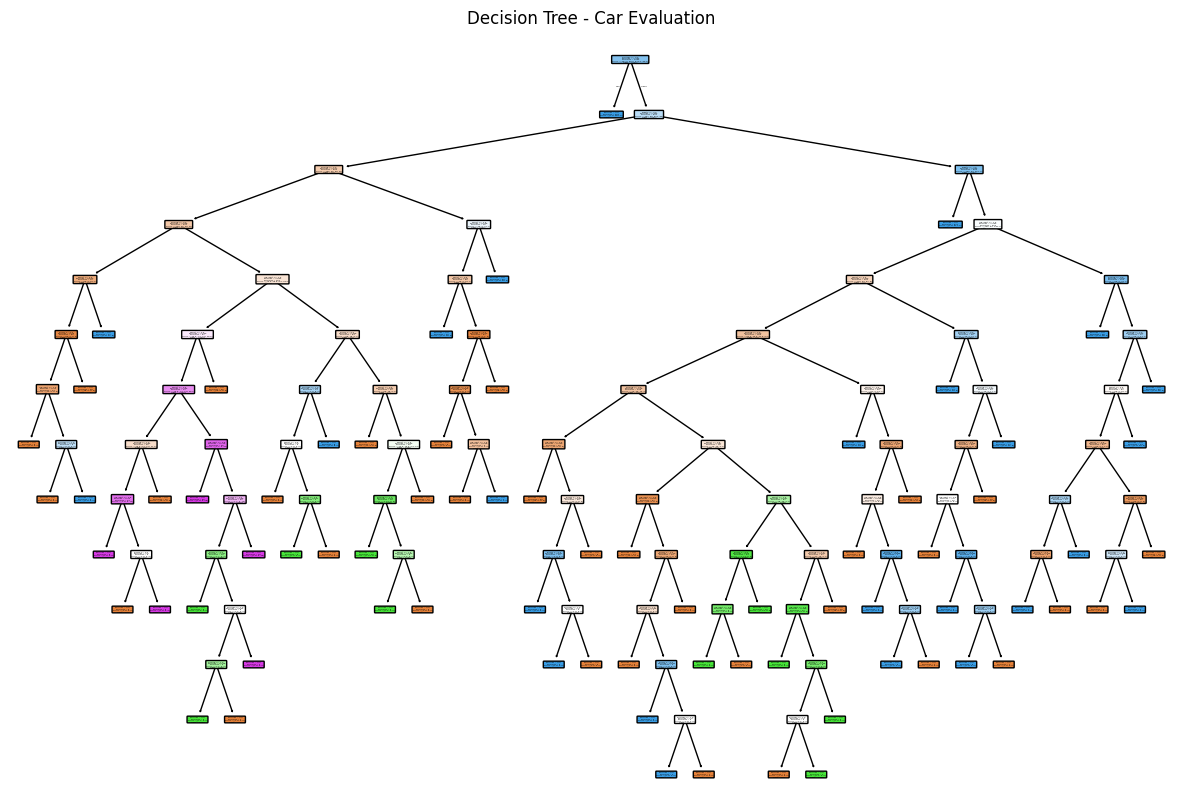

<Figure size 1000x600 with 0 Axes>

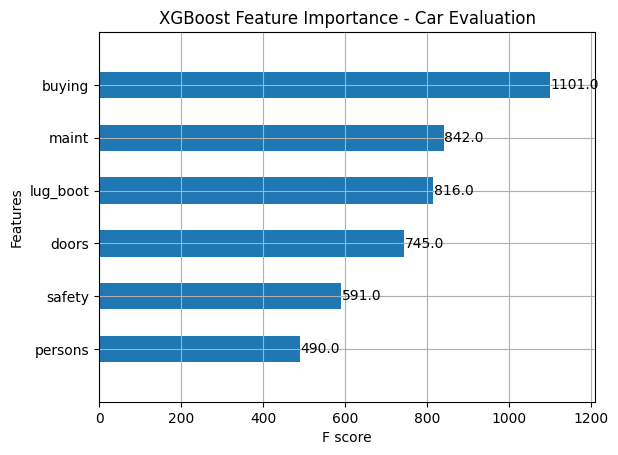

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import xgboost as xgb
from xgboost import plot_importance

# Step 1: Load the data
car_data = pd.read_csv('car.data', header=None)

# Define column names based on your c45-names
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'evaluation']
car_data.columns = columns
print(car_data.head())
# Step 2: Preprocess the data
# Encode categorical features using LabelEncoder
label_encoder = LabelEncoder()

# Apply encoding to all columns, including target 'evaluation'
for column in car_data.columns:
    car_data[column] = label_encoder.fit_transform(car_data[column])

# Step 3: Split the data into features (X) and target (y)
X = car_data.drop('evaluation', axis=1)  # Features
y = car_data['evaluation']  # Target (evaluation)

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train, y_train)

# Step 5: Train the XGBoost Model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Step 6: Make predictions and evaluate the models

# Decision Tree Predictions
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# XGBoost Predictions
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# Print out accuracy for both models
print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")
dt_depth = dt_model.get_depth()
print("Decision Tree Depth",dt_depth)

# Step 7: Plot Decision Tree
plt.figure(figsize=(15,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=label_encoder.classes_, rounded=True)
plt.title("Decision Tree - Car Evaluation")
plt.show()

# Step 8: Plot Feature Importance for XGBoost
plt.figure(figsize=(10,6))
plot_importance(xgb_model, importance_type='weight', max_num_features=10, height=0.5)
plt.title("XGBoost Feature Importance - Car Evaluation")
plt.show()


While I didn't mention Xgboost, the idea overall is a method to make sure that incorrecly classified points will now weigh more than previously, in order to consider them upon the next making of a tree. But, going back to the original decision tree, we see that this data set is perfect for the decision tree structure. It is able to work in the future space, and isn't too complex to where proper cuts could not be made. One of the most interesting parts of a decision tree's for me, is that once it's made, it doesn't even need a machine to be used. If someone gave me this tree on a piece of paper, hypothetically, I could use the tree myself and simply go down, and eventually be able to classify with a respectable accuracy. 

# Summary #
Decision tree's are extrmeley powerful, given the right scenario. There is a never a one size fits all, and in our case, this is especially true. There are many advantages to the tree like structure, and many use cases, however, those cases are becoming more and more sparse in the big data age. Despite that, as the professor mentioned, if we have tabular data, are on a deadline, and need something fast, XGBoost might just save us by the bell.